In [1]:
import torch
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

## Q1 


In [2]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

loss_list = []
torch.manual_seed(42)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        
        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1, bias=True)
#         self.activation2 = nn.Sigmoid()
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
#         x = self.activation2(x)
        return x;

class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx].to(device), self.Y[idx].to(device)

In [4]:
full_dataset = MyDataset(X, Y)
batch_size = 1
train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = XORModel().to(device)
print(model1)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.03)

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)


In [5]:
def train_one_epoch(epoch_index):
    totalLoss = 0
    
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step()
        totalLoss += loss.item()
        
    return totalLoss/(len(train_data_loader)*batch_size)

In [6]:
EPOCHS = 10000

for epoch in range(EPOCHS):
    model1.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    
    if(epoch%1000 == 0):
        print(f'Epoch {epoch}/{EPOCHS}, Loss: {avg_loss}')

Epoch 0/10000, Loss: 0.28392160683870316
Epoch 1000/10000, Loss: 0.27434141933918
Epoch 2000/10000, Loss: 0.27496761828660965
Epoch 3000/10000, Loss: 0.2701842896640301
Epoch 4000/10000, Loss: 0.20127231162041426
Epoch 5000/10000, Loss: 0.15611076998175122
Epoch 6000/10000, Loss: 0.14902873297251062
Epoch 7000/10000, Loss: 0.14668038780975223
Epoch 8000/10000, Loss: 0.1433300743228756
Epoch 9000/10000, Loss: 0.14312542797961214


In [7]:
for param in model1.named_parameters():
    print(param)

('linear1.weight', Parameter containing:
tensor([[-4.6750,  0.8913],
        [ 5.4160,  2.6998]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([-1.7461,  0.4696], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[1.9253, 2.0246]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([-1.5306], device='cuda:0', requires_grad=True))


The input is  = tensor([0., 1.], device='cuda:0')
Output y predicted = tensor([0.9869], device='cuda:0', grad_fn=<ViewBackward0>)


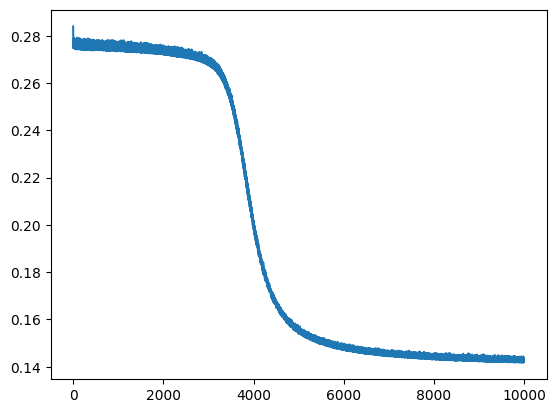

In [8]:
input = torch.tensor([0, 1], dtype=torch.float32).to(device)
model1.eval()
print('The input is  = {}'.format(input))
print("Output y predicted = {}".format(model1(input)))
plt.plot(loss_list)
plt.show()

## Q2


In [9]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

loss_list = []
torch.manual_seed(42)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        
        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(2, 1, bias=True)
#         self.activation2 = nn.Sigmoid()
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
#         x = self.activation2(x)
        return x;

class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx].to(device), self.Y[idx].to(device)

In [11]:
full_dataset = MyDataset(X, Y)
batch_size = 1
train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2 = XORModel().to(device)
print(model2)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.03)

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)


In [12]:
def train_one_epoch(epoch_index):
    totalLoss = 0
    
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model2(inputs)
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step()
        totalLoss += loss.item()
        
    return totalLoss/(len(train_data_loader)*batch_size)

In [13]:
EPOCHS = 10000

for epoch in range(EPOCHS):
    model2.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    
    if(epoch%1000 == 0):
        print(f'Epoch {epoch}/{EPOCHS}, Loss: {avg_loss}')

Epoch 0/10000, Loss: 0.32554721273481846
Epoch 1000/10000, Loss: 1.4169237953624327e-13
Epoch 2000/10000, Loss: 1.4170052460506406e-13
Epoch 3000/10000, Loss: 1.4602343856653932e-13
Epoch 4000/10000, Loss: 1.3889934260278083e-13
Epoch 5000/10000, Loss: 1.380406002720637e-13
Epoch 6000/10000, Loss: 1.46174203654887e-13
Epoch 7000/10000, Loss: 1.3698016245594635e-13
Epoch 8000/10000, Loss: 1.4056678455769134e-13
Epoch 9000/10000, Loss: 1.386382125095377e-13


In [14]:
for param in model2.named_parameters():
    print(param)

('linear1.weight', Parameter containing:
tensor([[-0.9436,  0.9436],
        [ 0.8584, -0.8584]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([-1.5917e-09,  1.3111e-11], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[1.0598, 1.1650]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([3.4655e-07], device='cuda:0', requires_grad=True))


The input is  = tensor([0., 1.], device='cuda:0')
Output y predicted = tensor([1.0000], device='cuda:0', grad_fn=<ViewBackward0>)


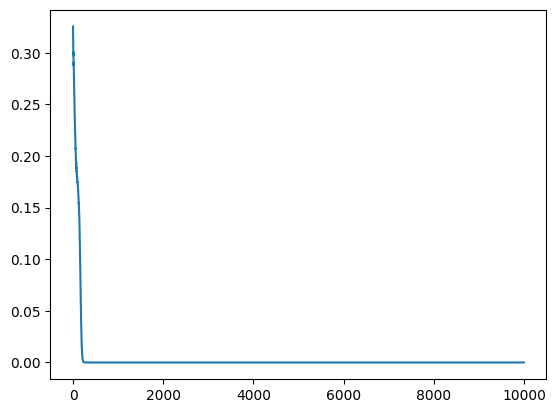

In [15]:
input = torch.tensor([0, 1], dtype=torch.float32).to(device)
model2.eval()
print('The input is  = {}'.format(input))
print("Output y predicted = {}".format(model2(input)))
plt.plot(loss_list)
plt.show()

## Q3


In [16]:
linear1w = model1.linear1.weight
linear1b = model1.linear1.bias

linear2w = model1.linear2.weight
linear2b = model1.linear2.bias

input = torch.tensor([0, 1], dtype=torch.float32).to(device)

layer1 = torch.sigmoid(torch.matmul(linear1w, input) + linear1b)
layer2 = torch.matmul(linear2w, layer1) + linear2b

print(layer1)
print(layer2)

tensor([0.2984, 0.9597], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([0.9869], device='cuda:0', grad_fn=<AddBackward0>)


## Q4


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [28]:
class FeedForwardNN(nn.Module):
    def __init__(self):
        super(FeedForwardNN, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        return self.model(x)

In [29]:
model = FeedForwardNN()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [30]:
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    epoch_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {epoch_accuracy:.2f}%")


Epoch [1/5], Loss: 0.2470, Accuracy: 89.94%
Epoch [2/5], Loss: 0.2515, Accuracy: 95.50%
Epoch [3/5], Loss: 0.0306, Accuracy: 96.92%
Epoch [4/5], Loss: 0.0042, Accuracy: 97.75%
Epoch [5/5], Loss: 0.0397, Accuracy: 98.05%


In [31]:
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)

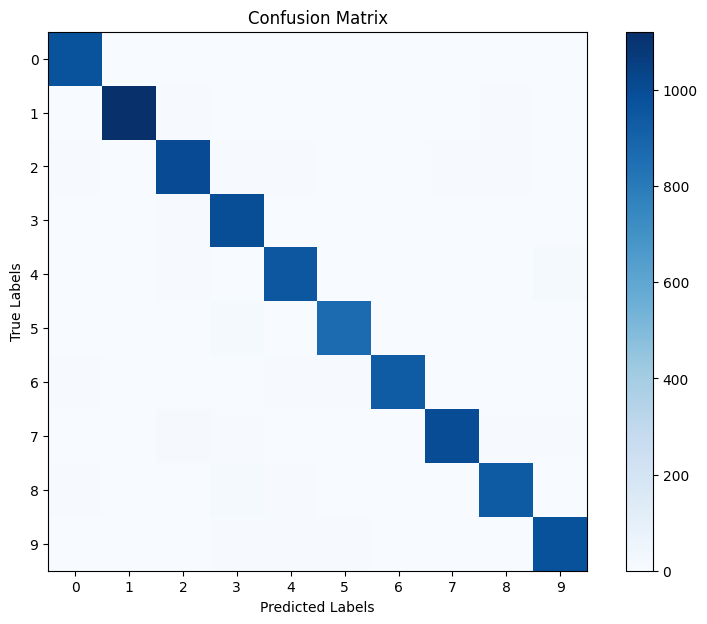

Number of learnable parameters: 109386


In [32]:
plt.figure(figsize=(10, 7))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Number of learnable parameters: {num_params}")